In [1]:
from hamsimtrotter_scipy import TrotterTimeEvo, TimeEvolutionType
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit

## Initial State
- Works with circuit or statevector

In [2]:
initial_state_circ = Circuit(4)
initial_state_circ.X(0)
initial_state_circ.X(1)

[X q[0]; X q[1]; ]

## Hamiltonian
- This is a random one I found

In [3]:
hamiltonian = QubitPauliOperator(
    {
        QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1,
        QubitPauliString(
            [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
            [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
        ): 0.4,
        QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 0.2,
    }
)

## Measurements
- The operators to measure after each trotter step.
- Here just tracking the Hamiltonian expectation measurements for imaginary time as it is minimised
- For real time it is often useful to track the populations or average magnetisation

In [4]:
measurements = [hamiltonian]

In [5]:
t_max=20
n_trotter_steps = 1000

In [6]:
trotter_time_evolution_imag = TrotterTimeEvo(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps, TimeEvolutionType.IMAG)

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] initial state is circuit


In [7]:
trotter_time_evolution_imag.execute()

## Dataframe
- returns a pandas dataframe which has easy plotting and saving of data

<AxesSubplot: xlabel='Time'>

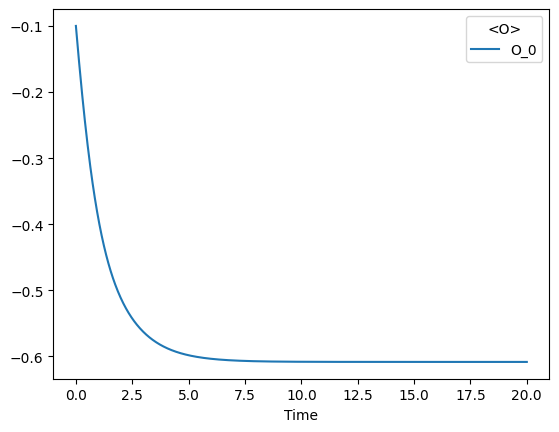

In [8]:
trotter_time_evolution_imag.evolved_measuremets.plot()

In [9]:
measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]

In [10]:
trotter_time_evolution_real = TrotterTimeEvo(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps, TimeEvolutionType.REAL)
trotter_time_evolution_real.execute()

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] initial state is circuit


<AxesSubplot: xlabel='Time'>

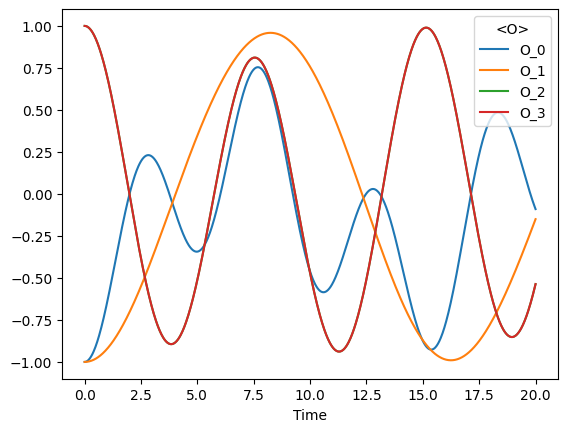

In [11]:
trotter_time_evolution_real.evolved_measuremets.plot()

## Task 1
- Change the scipy matrices to multiply as if they were a circuit
- Look at the trotter Error (Hint use the log scale)
- the circuit implemetation is U = exp(-i P_0 t) exp(-i P_1 t) ... exp(-i P_N t) 

## Task 2 
- Implement real time evolution this as circuits in pytket
- Hint use pauli exp box in Appendix 1 of https://arxiv.org/abs/2304.07917

## Task 3
- Implement trotterised imaginary time evolution with mid circuit measurement in pytket using https://arxiv.org/abs/2304.07917